<a href="https://colab.research.google.com/github/zfukuoka/Training-KikaiGakusyuZukan/blob/master/Chap2_05_SVM_Kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第２章教師あり学習

## 05 サポートベクトルマシン（カーネル法）

ポイント

* 基本は線形サポートベクトルマシンと変わらない
* 異なるのは高次元に展開したところで線形サポートベクトルマシンが動いている仕組みである
  * 高次元に展開の方法として４つがある *※本の中での解説であり、背景にsklearnで使えるものとして限定している可能性あり*
    * 線形カーネル
      * 事実上、線形サポートベクトルマシンと同じ
    * シグモイドカーネル
      * シグモイド関数を用いたもので曲線を用いたものが可能
    * 多項カーネル
      * 円形を用いたものも可能
    * RBFカーネル
      * sklearnのSVCのデフォルトで用いるカーネル


In [1]:
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# データ生成
X, y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=300)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)


0.9666666666666667

サンプルコードだけではわかりにくいので、線形サポートベクトルマシンと同様に matplotlib の等高線を示す contourtf() を用いると分かりやすい。

※詳細は線形サポートベクトルマシンを参照のこと（変更は範囲と粒度の変更のみ）

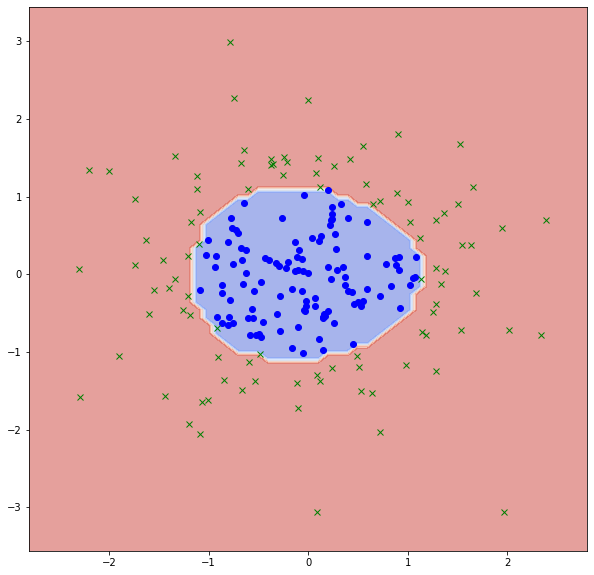

In [5]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 0.5, x.max() + 0.5
  y_min, y_max = y.min() - 0.5, y.max() + 0.5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

import numpy as np
yy = np.array(y_train)
y0 = np.where(yy==0)
y1 = np.where(yy==1)
mesh_x, mesh_y = make_meshgrid(X_train[0:,0], X_train[0:,1], h=0.1)
mesh_z = model.predict(np.c_[mesh_x.ravel(), mesh_y.ravel()])

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(X_train[y0,0], X_train[y0,1], "bo")
ax.plot(X_train[y1,0], X_train[y1,1], "gx")
ax.contourf(
    mesh_x, mesh_y, mesh_z.reshape(mesh_x.shape),
    cmap=plt.cm.coolwarm, alpha=0.5, zorder=-10)